## data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import random

from matplotlib import gridspec

In [2]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\segoeuiz.ttf',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\WINDOWS\\Fonts\\Hack-Italic.ttf',
 'C:\\WINDOWS\\Fonts\\msjhl.ttc',
 'C:\\WINDOWS\\Fonts\\YuGothR.ttc',
 'C:\\WINDOWS\\Fonts\\Hack-Bold.ttf',
 'C:\\Windows\\Fonts\\lucon.ttf',
 'C:\\WINDOWS\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\calibri.ttf',
 'C:\\WINDOWS\\Fonts\\calibril.ttf',
 'C:\\WINDOWS\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\corbelb.ttf',
 'C:\\WINDOWS\\Fonts\\comic.ttf',
 'C:\\WINDOWS\\Fonts\\Hack-BoldItalic.ttf',
 'C:\\WINDOWS\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\georgia.ttf',
 'C:\\WINDOWS\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\D2CodingBold-Ver1.3.2-20180524.ttf',
 'C:\\WINDOWS\\Fonts\\corbelz.ttf',
 'C:\\WINDOWS\\Fonts\\marlett.ttf',
 'C:\\WINDOWS\\Fonts\\corbel.ttf',
 'C:\\WINDOWS\\Fonts\\LeelaUIb.ttf',
 'C:\\WINDOWS\\Fonts\\Gabriola.

In [3]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_6560\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [4]:
FILES_DIR = '../files/'
log_df = pd.read_csv(FILES_DIR + 'log_csv.csv')

In [5]:
log = log_df.copy()

In [6]:
# column describe 
def descriptive_info(log):
    number_of_cells = log.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', log.describe())

descriptive_info(log)

Total number of cells the datafile has: 
Unnamed: 0         5659541
uid                5473228
action_type        5659541
category1          5659541
category2          5659541
category3          4879535
collect_time       5659541
geoip_city_name    5242509
useragent_os       5659541
viewrate           5657112
viewtime           5659541
dtype: int64


Printing descriptive statistics...

          Unnamed: 0      viewrate      viewtime
count  5.659541e+06  5.657112e+06  5.659541e+06
mean   2.829770e+06  7.677686e+01  5.126022e+04
std    1.633769e+06  4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.414885e+06  1.000000e+02  8.940000e+02
50%    2.829770e+06  1.000000e+02  1.010400e+04
75%    4.244655e+06  1.000000e+02  4.800500e+04
max    5.659540e+06  1.000000e+02  8.636989e+07


In [7]:
# null값 퍼센트로 보기
(log.isnull().sum()/ log.shape[0]).sort_values(ascending=False)

category3          0.137821
geoip_city_name    0.073687
uid                0.032920
viewrate           0.000429
Unnamed: 0         0.000000
action_type        0.000000
category1          0.000000
category2          0.000000
collect_time       0.000000
useragent_os       0.000000
viewtime           0.000000
dtype: float64

In [8]:
# 서울과 경기도는 시, 구와 중복 데이터이기 때문에 drop한다
log_null_ts = log.copy()
drop_city = log_null_ts[log_null_ts['geoip_city_name'] != 'Seoul']
drop_city = drop_city[drop_city['geoip_city_name'] != 'Gyeonggi-do']

drop_city.isnull().sum().sort_values(ascending=False)

category3          643126
geoip_city_name    417032
uid                132162
viewrate             1722
Unnamed: 0              0
action_type             0
category1               0
category2               0
collect_time            0
useragent_os            0
viewtime                0
dtype: int64

In [9]:
# null값들을 un_** 으로 채워서 확인해보기
log_drop_null = drop_city
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('un_name', inplace = True)
log_drop_null.dropna(axis = 0, inplace = True)
print(log_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


In [10]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


## 광고 최적화

In [11]:
# 날짜 데이터 데이트타임으로 바꾸기
def _trans_date_time(log):
    log.index = pd.to_datetime(log['collect_time'], infer_datetime_format=True)
    log.drop('collect_time', axis=1, inplace=True)
    return log

_trans_date_time(log_drop_null)

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0


In [12]:
log_drop_null["Hour"] = log_drop_null.index.hour
log_drop_null['Minute'] = log_drop_null.index.minute

In [13]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [14]:
basket_hour = log_drop_null.loc[log_drop_null['action_type'] == 'Basket']
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
2022-12-29 11:00:45,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,Mapo-gu,Windows,0.0,0,11,0
2022-12-29 11:48:43,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,Gangnam-gu,Windows,0.0,0,11,48
2022-12-29 18:01:46,129,eZVNKmBQMGcAAZPC,Basket,가구,행거·옷장,행거,Mokpo,Windows,0.0,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:24:24,5659340,c37ZeGLn6YoACX9Y,Basket,가전·디지털,주방가전,커피메이커·머신,Incheon,Windows,0.0,0,18,24
2022-12-28 17:20:48,5659363,cxWkMmOS27MAA/zz,Basket,가전·디지털,주방가전,오븐·전자레인지,Bucheon-si,Windows,0.0,0,17,20
2022-12-29 10:27:10,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,Gwangju,Windows,0.0,0,10,27


In [15]:
basket_hour['Hour'].value_counts(normalize=True)

15    0.083965
14    0.081647
13    0.081536
11    0.080453
16    0.078377
10    0.070698
17    0.061447
12    0.061088
9     0.043931
21    0.042579
22    0.041862
23    0.040144
20    0.037819
0     0.036087
18    0.035611
19    0.033749
1     0.023545
2     0.016757
8     0.016253
3     0.010576
4     0.006271
7     0.005747
5     0.005416
6     0.004443
Name: Hour, dtype: float64

In [16]:
basket_hour["time"] = np.where((basket_hour['Hour'] >= 10)&(basket_hour["Hour"].values <= 17) , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_6560\3296599162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_hour["time"] = np.where((basket_hour['Hour'] >= 10)&(basket_hour["Hour"].values <= 17) , "1","0" )


In [17]:
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute,time
collect_time,,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56,1
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53,1
2022-12-29 11:00:45,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,Mapo-gu,Windows,0.0,0,11,0,1
2022-12-29 11:48:43,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,Gangnam-gu,Windows,0.0,0,11,48,1
2022-12-29 18:01:46,129,eZVNKmBQMGcAAZPC,Basket,가구,행거·옷장,행거,Mokpo,Windows,0.0,0,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:24:24,5659340,c37ZeGLn6YoACX9Y,Basket,가전·디지털,주방가전,커피메이커·머신,Incheon,Windows,0.0,0,18,24,0
2022-12-28 17:20:48,5659363,cxWkMmOS27MAA/zz,Basket,가전·디지털,주방가전,오븐·전자레인지,Bucheon-si,Windows,0.0,0,17,20,1
2022-12-29 10:27:10,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,Gwangju,Windows,0.0,0,10,27,1


In [21]:
basket_hour_1 = basket_hour.loc[basket_hour["time"] == "1"]
basket_hour_1['useragent_os'].value_counts(normalize=True)

Windows      0.925649
Mac OS X     0.070080
iOS          0.002084
Linux        0.001209
Android      0.000863
Chrome OS    0.000115
Name: useragent_os, dtype: float64

In [22]:
non_basket_hour = log_drop_null.loc[log_drop_null['action_type'] != 'Basket']
non_basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 09:13:14,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,Gwanak-gu,Windows,100.0,37161,9,13
2022-12-29 15:32:12,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,Gangnam-gu,Windows,100.0,8483,15,32
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 15:20:28,5659531,fG9bBGOiwtgAAuZu,Highlight,조명,형광등·조명부속품,전구·형광등,Cheonan,Windows,0.0,0,15,20
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40


In [23]:
non_basket_hour['Hour'].value_counts(normalize=True)

13    0.077019
15    0.074075
14    0.071669
16    0.071004
11    0.070580
10    0.066706
17    0.059240
9     0.051458
12    0.051425
22    0.050899
21    0.046065
23    0.043929
0     0.041723
20    0.040050
18    0.036628
19    0.035160
1     0.026488
8     0.021535
2     0.018486
3     0.011816
7     0.010834
4     0.008375
6     0.007642
5     0.007193
Name: Hour, dtype: float64

15    0.083965
14    0.081647
13    0.081536
11    0.080453
16    0.078377
10    0.070698
17    0.061447
12    0.061088
9     0.043931
21    0.042579
22    0.041862
23    0.040144
20    0.037819
0     0.036087
18    0.035611
19    0.033749
1     0.023545
2     0.016757
8     0.016253
3     0.010576
4     0.006271
7     0.005747
5     0.005416
6     0.004443
Name: Hour, dtype: float64

13    0.077019
15    0.074075
14    0.071669
16    0.071004
11    0.070580
10    0.066706
17    0.059240
9     0.051458
12    0.051425
22    0.050899
21    0.046065
23    0.043929
0     0.041723
20    0.040050
18    0.036628
19    0.035160
1     0.026488
8     0.021535
2     0.018486
3     0.011816
7     0.010834
4     0.008375
6     0.007642
5     0.007193
Name: Hour, dtype: float64

13    0.077159
15    0.074382
14    0.071978
16    0.071233
11    0.070886
10    0.066830
17    0.059309
12    0.051725
9     0.051224
22    0.050619
21    0.045957
23    0.043812
0     0.041548
20    0.039981
18    0.036596
19    0.035117
1     0.026397
8     0.021371
2     0.018432
3     0.011777
7     0.010677
4     0.008309
6     0.007543
5     0.007138
Name: Hour, dtype: float64

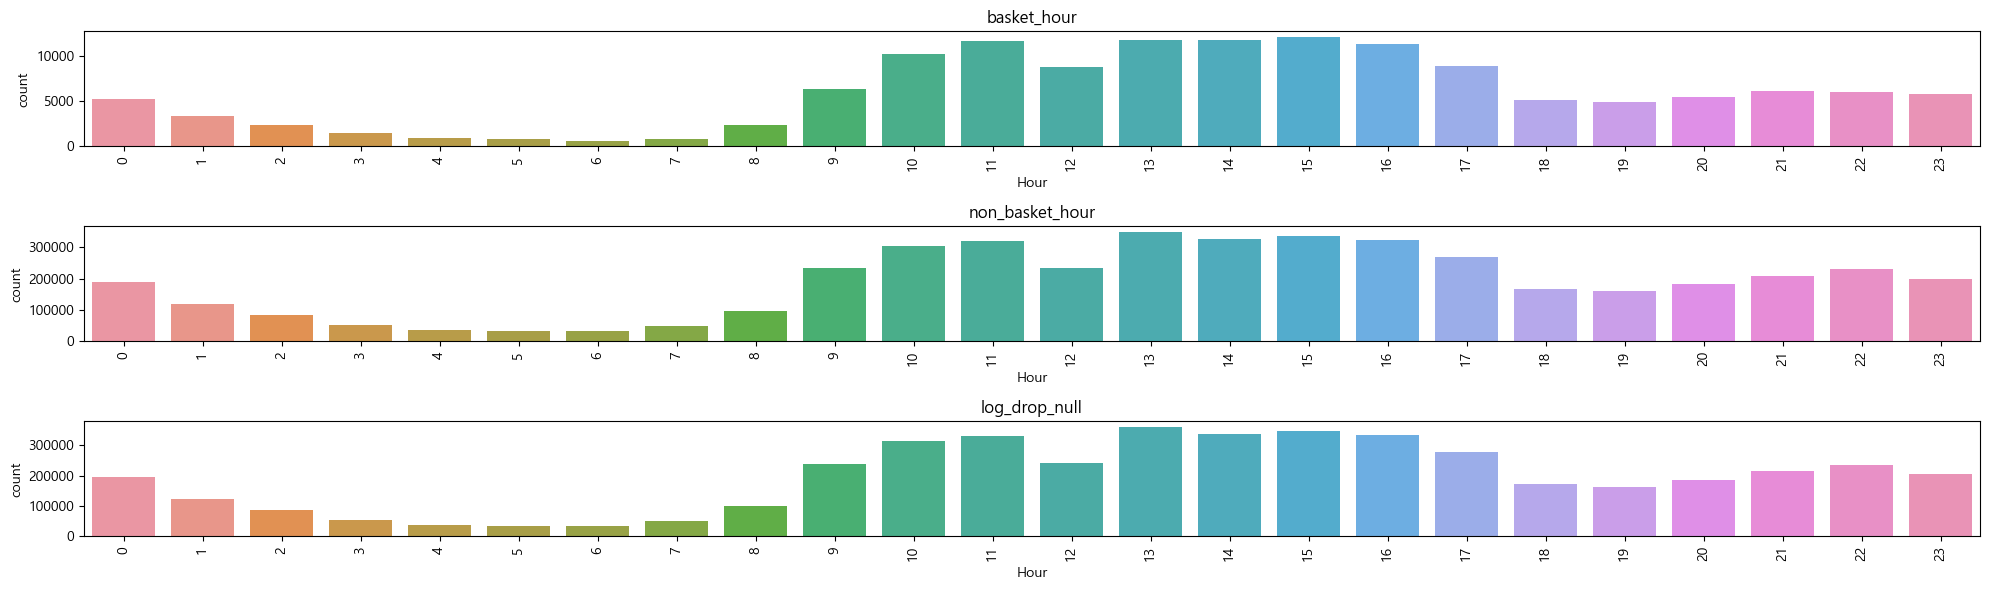

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(3, 1, 1)
display(basket_hour["Hour"].value_counts(normalize=True))
sns.countplot(data=basket_hour, x="Hour")
plt.title('basket_hour')
plt.xticks(rotation=90)


plt.subplot(3, 1, 2)                
display(non_basket_hour["Hour"].value_counts(normalize=True))
sns.countplot(data=non_basket_hour, x="Hour")
plt.title('non_basket_hour')
plt.xticks(rotation=90)


plt.subplot(3, 1, 3)                
display(log_drop_null["Hour"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="Hour")
plt.title('log_drop_null')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [25]:
log_view_time = log_drop_null.loc[log_drop_null["viewtime"] > 0]
log_view_time

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 09:13:14,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,Gwanak-gu,Windows,100.0,37161,9,13
2022-12-29 15:32:12,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,Gangnam-gu,Windows,100.0,8483,15,32
2022-12-29 16:15:35,8,d8SbF2KNyXIAClrS,View,실내운동,유산소,스텝퍼,un_city_name,Windows,100.0,2944,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 22:57:13,5659527,fG8fe2OsSzQAB8bX,View,패브릭,홈패브릭,홈웨어,Daejeon,iOS,100.0,3462,22,57
2022-12-29 11:45:10,5659530,0rIeEmOs/WwABY+T,View,유아·아동,수납장·옷장,서랍장·수납장,un_city_name,Windows,100.0,228022,11,45
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45


In [26]:
log_view_time["time"] = np.where((log_view_time['Hour'] >= 10)&(log_view_time["Hour"].values <= 17) , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_6560\448817480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_view_time["time"] = np.where((log_view_time['Hour'] >= 10)&(log_view_time["Hour"].values <= 17) , "1","0" )


In [27]:
log_view_time_1 = log_view_time.loc[log_view_time["time"] == "1"]
log_view_time_1['viewtime'].mean() / 1000

58.68928678290431

In [28]:
log_view_time_0 = log_view_time.loc[log_view_time["time"] == "0"]
log_view_time_0['viewtime'].mean() / 1000

73.7153941901714

## basket_uid별로 분석

In [29]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [30]:
log_uid = list(set(log_drop_null['uid'].to_list()))

In [31]:
len(log_uid)

647910

In [32]:
log_uid_set = log_drop_null.loc[log_drop_null['action_type'] == 'Basket', 'uid']
log_uid_set = list(set(log_uid_set.to_list()))
len(log_uid_set)

34462

array(['uid', 'action_type', 'category1', 'category2', 'category3',
       'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime', 'Hour',
       'Minute'], dtype=object)

In [ ]:
# 강사님 이부분 피드백 부탁드립니다
# for문이 돌아가는데 너무 오래걸립니다 ㅠㅠ
# 혹시 빠르게 돌릴수 있을까요??? ㅠㅠ
# 하루정도 걸리더라고요 ㅠㅠ
# 시간이 너무 오래걸린다

columns = log_drop_null.columns.values[1:]
basket_uid = pd.DataFrame(columns=columns)
for _id in log_uid_set:
    df = log_drop_null.loc[log_drop_null['uid'] == _id]
    basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
basket_uid



"\ncolumns = ['uid', 'action_type', 'category1', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime']\nbasket_uid = pd.DataFrame(columns=columns)\nfor _id in log_uid_set:\n    df = log_drop_null.loc[log_drop_null['uid'] == _id]\n    basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)\nbasket_uid\n\n"

In [ ]:
random.seed(33)
log_uid_set_1000 = random.sample(log_uid_set, 1000)

columns = ['uid', 'action_type', 'category1', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime']
basket_uid = pd.DataFrame(columns=columns)
for _id in log_uid_set_1000:
    df = log_drop_null.loc[log_drop_null['uid'] == _id]
    basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
basket_uid

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basket_uid = basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\710212489.py:8: FutureWarning: The frame.append method is deprecated 

,uid,action_type,category1,geoip_city_name,useragent_os,viewrate,viewtime
0,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,10134
1,dinU2mCsSfEABquC,Basket,공구·DIY,Ansan-si,Windows,0.0,0
2,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,977508
3,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,153492
4,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,225850
...,...,...,...,...,...,...,...
42288,3E/riWOtCvoADh+o,View,패브릭,Guri-si,Windows,100.0,7058
42289,3E/riWOtCvoADh+o,View,패브릭,Guri-si,Windows,100.0,7583
42290,3E/riWOtCvoADh+o,View,유아·아동,Guri-si,Windows,100.0,40033
42291,3E/riWOtCvoADh+o,View,데코·식물,Guri-si,Windows,100.0,173136


In [ ]:
for col in list(basket_uid.columns):
    print(col)
    print(basket_uid[col].value_counts(normalize=True))
    print('\n')

uid
MaPsDWNS0aQADF6C    0.019081
Ox/42WOlpfgACXwJ    0.014872
cKDdWmK+flwAB/UI    0.014825
0mdTHWMEfRUACIJV    0.009647
eZapCGJwbsUACCN7    0.008819
                      ...   
cJ5YL2NZdFwABTdI    0.000047
r9HB1l/7JbMAC3Yk    0.000047
3HpJ2V/9vncAATWs    0.000047
eXzGEGMFtyQACeFX    0.000024
avnFUmNfG1AAAYCZ    0.000024
Name: uid, Length: 1000, dtype: float64


action_type
View         0.796988
Basket       0.102972
Highlight    0.091741
Copy         0.008134
SINF         0.000166
Name: action_type, dtype: float64


category1
가구         0.329629
패브릭        0.147542
주방용품       0.145840
데코·식물      0.070224
수납·정리      0.062753
             ...   
이지주방       0.000024
살림하는집      0.000024
몬타디자인      0.000024
아르테미데      0.000024
아이리스코리아    0.000024
Name: category1, Length: 193, dtype: float64


geoip_city_name
Busan           0.069539
un_city_name    0.068782
Seongnam-si     0.050718
Incheon         0.050245
Daegu           0.047029
                  ...   
Ganghwa-gun     0.000095
Hamyang  

In [ ]:
windows_uid = basket_uid.loc[basket_uid['useragent_os'] == 'Windows']
windows_uid

,uid,action_type,category1,geoip_city_name,useragent_os,viewrate,viewtime
0,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,10134
1,dinU2mCsSfEABquC,Basket,공구·DIY,Ansan-si,Windows,0.0,0
2,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,977508
3,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,153492
4,dinU2mCsSfEABquC,View,공구·DIY,Ansan-si,Windows,100.0,225850
...,...,...,...,...,...,...,...
42288,3E/riWOtCvoADh+o,View,패브릭,Guri-si,Windows,100.0,7058
42289,3E/riWOtCvoADh+o,View,패브릭,Guri-si,Windows,100.0,7583
42290,3E/riWOtCvoADh+o,View,유아·아동,Guri-si,Windows,100.0,40033
42291,3E/riWOtCvoADh+o,View,데코·식물,Guri-si,Windows,100.0,173136


In [ ]:
non_window_uid = basket_uid.loc[basket_uid['useragent_os'] != 'Windows']
non_window_uid

,uid,action_type,category1,geoip_city_name,useragent_os,viewrate,viewtime
355,eYXHQGOo7gIAAXTj,View,가구,Seongnam-si,Mac OS X,100.0,12009
356,eYXHQGOo7gIAAXTj,View,공구·DIY,Seongnam-si,Mac OS X,100.0,97326
357,eYXHQGOo7gIAAXTj,View,패브릭,Seongnam-si,Mac OS X,100.0,3030
358,eYXHQGOo7gIAAXTj,Highlight,가구,Seongnam-si,Mac OS X,0.0,0
359,eYXHQGOo7gIAAXTj,Basket,패브릭,Seongnam-si,Mac OS X,0.0,0
...,...,...,...,...,...,...,...
42199,fDaGCWGd44IADoCA,View,가구,Seongdong-gu,Mac OS X,100.0,9032
42200,fDaGCWGd44IADoCA,View,가구,Seongdong-gu,Mac OS X,100.0,93093
42201,fDaGCWGd44IADoCA,View,가구,Seongdong-gu,Mac OS X,100.0,13320
42202,fDaGCWGd44IADoCA,View,가구,Seongdong-gu,Mac OS X,100.0,18754


View         0.788171
Basket       0.105384
Highlight    0.097938
Copy         0.008374
SINF         0.000132
Name: action_type, dtype: float64

View         0.870033
Basket       0.082986
Highlight    0.040395
Copy         0.006147
SINF         0.000439
Name: action_type, dtype: float64

View         0.796988
Basket       0.102972
Highlight    0.091741
Copy         0.008134
SINF         0.000166
Name: action_type, dtype: float64

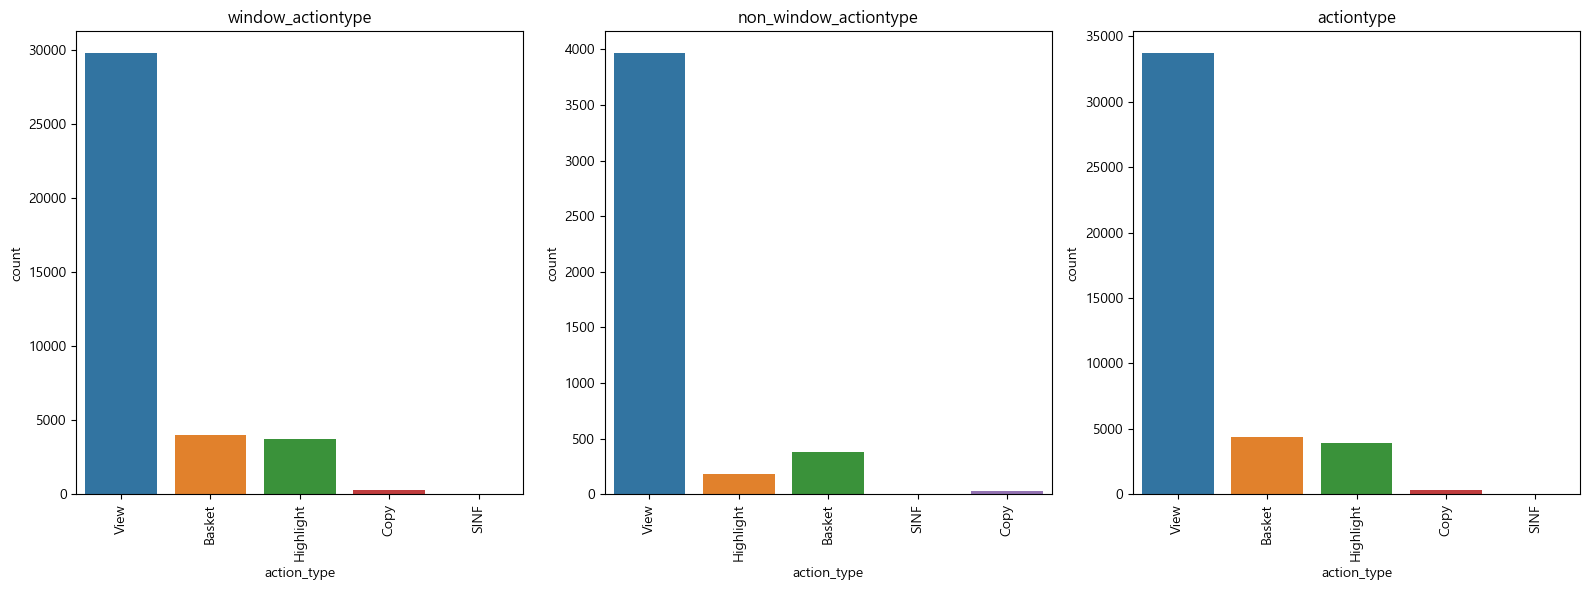

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
display(windows_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=windows_uid, x="action_type")
plt.title('window_actiontype')
plt.xticks(rotation=90)


plt.subplot(1, 3, 2)                
display(non_window_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=non_window_uid, x="action_type")
plt.title('non_window_actiontype')
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)                
display(basket_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=basket_uid, x="action_type")
plt.title('actiontype')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

View         0.796988
Basket       0.102972
Highlight    0.091741
Copy         0.008134
SINF         0.000166
Name: action_type, dtype: float64

View         0.862716
Highlight    0.082997
Basket       0.031032
Copy         0.018725
SINF         0.004530
Name: action_type, dtype: float64

Windows     0.892299
Mac OS X    0.097014
iOS         0.004161
Android     0.003949
Linux       0.002577
Name: useragent_os, dtype: float64

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

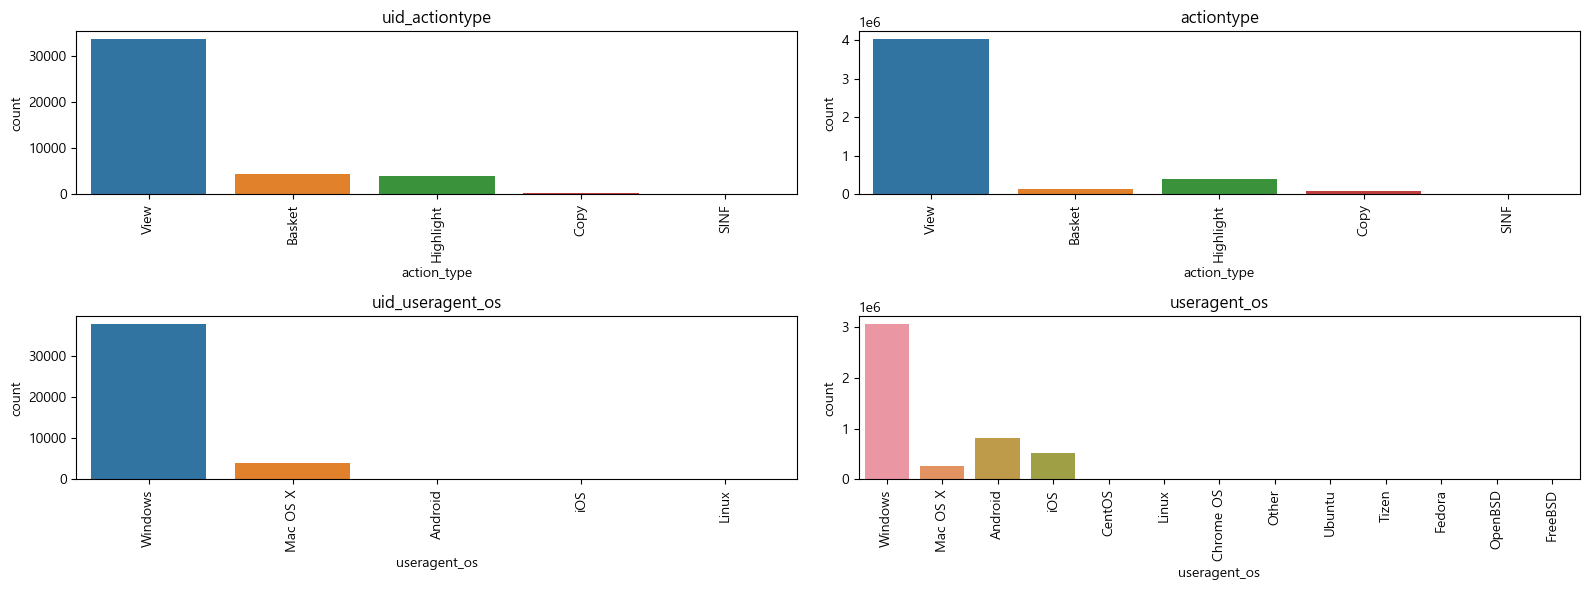

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
display(basket_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=basket_uid, x="action_type")
plt.title('uid_actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 2)
display(log_drop_null["action_type"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="action_type")
plt.title('actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 3)
display(basket_uid["useragent_os"].value_counts(normalize=True))
sns.countplot(data=basket_uid, x="useragent_os")
plt.title('uid_useragent_os')
plt.xticks(rotation=90)


plt.subplot(2, 2, 4)
display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="useragent_os")
plt.title('useragent_os')
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

## non basket_uid

In [ ]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


In [ ]:
log_uid = list(set(log_drop_null['uid'].to_list()))
len(log_uid)

647910

In [ ]:
log_uid_set = log_drop_null.loc[log_drop_null['action_type'] != 'Basket', 'uid']
log_uid_set = list(set(log_uid_set.to_list()))
len(log_uid_set)

647728

In [ ]:
random.seed(33)
log_uid_set_1000 = random.sample(log_uid_set, 1000)

columns = ['uid', 'action_type', 'category1', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime']
non_basket_uid = pd.DataFrame(columns=columns)
for _id in log_uid_set_1000:
    df = log_drop_null.loc[log_drop_null['uid'] == _id]
    non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
non_basket_uid

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_basket_uid = non_basket_uid.append(pd.DataFrame(data=df, columns=columns), ignore_index=True)
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_2276\2384289581.py:8: FutureWarning: The frame.

,uid,action_type,category1,geoip_city_name,useragent_os,viewrate,viewtime
0,bi/FOGOmVaoABxWo,View,생필품,Bupyeong-gu,Mac OS X,0.0,0
1,OxOUa2NzPosAA3pi,View,가구,Busan,Mac OS X,100.0,45822
2,OxOUa2NzPosAA3pi,View,가구,Busan,Mac OS X,100.0,18127
3,OxOUa2NzPosAA3pi,View,가구,Busan,Mac OS X,100.0,2140
4,OxOUa2NzPosAA3pi,View,패브릭,Busan,Mac OS X,100.0,115511
...,...,...,...,...,...,...,...
7534,3FPU3GOoAQEACThQ,View,수납·정리,Daejeon,iOS,0.0,0
7535,dusD2GN9Ky4ABINo,View,데코·식물,Namyangju,iOS,100.0,126958
7536,dusD2GN9Ky4ABINo,View,주방용품,Namyangju,iOS,100.0,3049
7537,dusD2GN9Ky4ABINo,View,주방용품,Namyangju,iOS,0.0,0


In [ ]:
for col in list(non_basket_uid.columns):
    print(col)
    print(non_basket_uid[col].value_counts(normalize=True))
    print('\n')

uid
OwwIJmOpmksACu3d    0.064995
OxBuDl/DbrUAB8Uj    0.049078
eUKK1WN/FQMACCWx    0.032100
ebzEoWOkc/sACazu    0.031437
0zPC5WMr7iYACRk8    0.029712
                      ...   
amWCVWOdorgAAjDf    0.000133
r3nwrmOlbpkADDSe    0.000133
bkYPeWJaD10ABi8o    0.000133
ealvGmMoLXMACxl6    0.000133
bi/FOGOmVaoABxWo    0.000133
Name: uid, Length: 1000, dtype: float64


action_type
View         0.867091
Highlight    0.061414
Basket       0.055312
Copy         0.012999
SINF         0.003183
Name: action_type, dtype: float64


category1
가구                  0.383605
패브릭                 0.133705
주방용품                0.078525
데코·식물               0.076005
가전·디지털              0.065526
수납·정리               0.063404
생활용품                0.039263
노하우                 0.032498
캠핑용품                0.029049
생필품                 0.017509
조명                  0.016050
반려동물                0.012468
유아·아동               0.012336
공구·DIY              0.012071
식품                  0.004775
실내운동                0.003449
인테리

View         0.867091
Highlight    0.061414
Basket       0.055312
Copy         0.012999
SINF         0.003183
Name: action_type, dtype: float64

View         0.862716
Highlight    0.082997
Basket       0.031032
Copy         0.018725
SINF         0.004530
Name: action_type, dtype: float64

Windows     0.634302
Android     0.152142
Mac OS X    0.125083
iOS         0.085025
Ubuntu      0.002520
Other       0.000531
Linux       0.000398
Name: useragent_os, dtype: float64

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

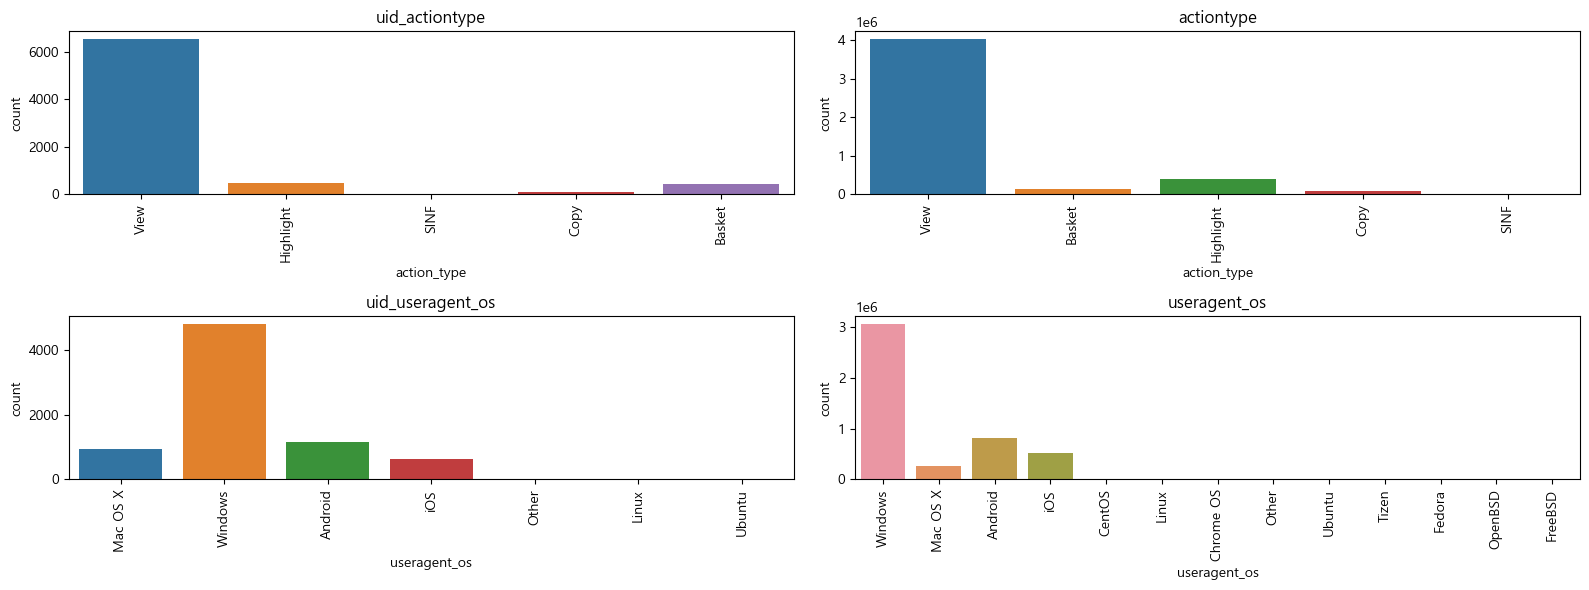

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
display(non_basket_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=non_basket_uid, x="action_type")
plt.title('uid_actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 2)
display(log_drop_null["action_type"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="action_type")
plt.title('actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 3)
display(non_basket_uid["useragent_os"].value_counts(normalize=True))
sns.countplot(data=non_basket_uid, x="useragent_os")
plt.title('uid_useragent_os')
plt.xticks(rotation=90)


plt.subplot(2, 2, 4)
display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="useragent_os")
plt.title('useragent_os')
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

## 대조군과 실험군 비교 (without PSM)

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

# Load lung_cancer.csv
df = pd.read_csv('lung_cancer.csv')

# drop row having null "race" column
df = df[df['race']==df['race']]

# drop row having useless column
df = df.drop(['pid'],axis=1)
df = df.drop(['stage_of_cancer'],axis=1)

# binarization for target variable
df['days_to_cancer'] = df['days_to_cancer'].apply(lambda x : 1 if x==x else 0)

# rename columns
df.columns = ['age','gender','race','smoker','cancer']

# remove rows, which age is within 40's. here doesn't have target(=1) as well as the number of rows is only 2
df = df.loc[df.index.to_series().apply(lambda x : True if x not in df[(df['age']>=40) & (df['age']<50)].index else False)]

age categorization 
def age_cate(x):
    if x >=50 and x <60:
        return '50s'
    elif x >=60 and x <70:
        return '60s'
    else:
        return '70s'

df['age'] = df['age'].apply(lambda x : age_cate(x))

# prepare dataset
feature_df_a = df[df['smoker']=='Former'][['age','gender','race']]
feature_df_b = df[df['smoker']=='Current'][['age','gender','race']]

total_df_a = pd.concat([pd.get_dummies(feature_df_a),df[df['smoker']=='Former'][['cancer']]],axis=1)
total_df_b = pd.concat([pd.get_dummies(feature_df_b),df[df['smoker']=='Current'][['cancer']]],axis=1)

# hypothesis : Does Smoking Affect Cancer Risk?
# chi-square test

a_0 = total_df_a[total_df_a['cancer']==0].shape[0]
a_1 = total_df_a[total_df_a['cancer']==1].shape[0]
b_0 = total_df_b[total_df_b['cancer']==0].shape[0]
b_1 = total_df_b[total_df_b['cancer']==1].shape[0]

dataset_chi = [[a_0, a_1], [b_0, b_1]]
pval = stats.chi2_contingency(dataset_chi)[1]
print('p-value : ',round(pval,3))

## 대조군과 실험군 비교 (with PSM Logic)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
dataset = pd.concat([pd.get_dummies(df[['age','gender','race']]),df['smoker'].map({'Current':1,'Former':0}),df['cancer']],axis=1)

dataset = dataset.reset_index(drop=True)

X = dataset.loc[:,:'race_White']

y = dataset[['smoker']]


lr = LogisticRegression()
lr.fit(X, y)
pred_prob = lr.predict_proba(X)

dataset['ps'] = pred_prob[:, 1]
# print(dataset['ps'])
# print('-' * 50)
caliper = np.std(dataset.ps) * 0.25

print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 20

# setup knn
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

ps = dataset[['ps']]  # double brackets as a dataframe
knn.fit(ps)
distances, neighbor_indexes = knn.kneighbors(ps)

# for each point in smoker, we find a matching point in control without replacement
# note the 10 neighbors may include both points in smoker and control
from tqdm import tqdm

matched_control = []  # keep track of the matched observations in control

for current_index, row in tqdm(dataset.iterrows()):  # iterate over the dataframe
    if row.smoker == 0:  # the current row is in the control group
        dataset.loc[current_index, 'matched'] = np.nan  # set matched to nan
    else: 
        for idx in neighbor_indexes[current_index, :]: # for each row in smoker, find the k neighbors
            # make sure the current row is not the idx - don't match to itself
            # and the neighbor is in the control 
            if (current_index != idx) and (dataset.loc[idx].smoker == 0):
                if idx not in matched_control:  # this control has not been matched yet
                    dataset.loc[current_index, 'matched'] = idx  # record the matching
                    matched_control.append(idx)  # add the matched to the list
                    break

# try to increase the number of neighbors and/or caliper to get more matches
print('total observations in treatment:', len(dataset[dataset.smoker==1]))
print('total matched observations in control:', len(matched_control))

# control have no match
treatment_matched = dataset.dropna(subset=['matched'])  # drop not matched

# matched control observation indexes
control_matched_idx = treatment_matched.matched
control_matched_idx = control_matched_idx.astype(int)  # change to int
control_matched = dataset.loc[control_matched_idx, :]  # select matched control observations

# combine the matched treatment and control
df_matched = pd.concat([treatment_matched, control_matched])

# matched control and treatment
df_matched_control = df_matched[df_matched.smoker==0]
df_matched_treatment = df_matched[df_matched.smoker==1]

# hypothesis : Does Smoking Affect Cancer Risk?
# chi-square test with PSM
a_0 = df_matched_control[df_matched_control['cancer']==0].shape[0]
a_1 = df_matched_control[df_matched_control['cancer']==1].shape[0]
b_0 = df_matched_treatment[df_matched_treatment['cancer']==0].shape[0]
b_1 = df_matched_treatment[df_matched_treatment['cancer']==1].shape[0]

dataset_chi = [[a_0, a_1], [b_0, b_1]]
pval = stats.chi2_contingency(dataset_chi)[1]
print('p-value : ',round(pval,5))